# Analyse of sensors' data 

In [128]:
import numpy as np
import pandas as pd

from pandas.api.types import CategoricalDtype

import os
import requests 
import zipfile
import io
from pathlib import Path

from datetime import date

In [129]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

import matplotlib.pyplot as plt

In [130]:
np.set_printoptions(precision=2, suppress=True)
%matplotlib inline
pd.options.plotting.backend = "plotly"

In [131]:
params = dict(
    timecourse = '',    
    drypath = os.path.join('.', 'sensors_test_dry_nonisolated.csv'),
    drypath_air = os.path.join('.', 'sensors_test_dry_air.csv'),
    drypath_soil = os.path.join('.', 'sensors_test_dry_soil.csv'),
    moistpath_water = os.path.join('.', 'sensors_test_moist_nonisolated.csv'),
    moistpath_soil = os.path.join('.', 'YYY.csv'),
    calibration_path = os.path.join('.', 'sensors_calibration.csv'),
    calibr_persent_path = os.path.join('.', 'persentage_calibration.csv'),
    sensor_max_value = 1023
)

columns = [ 'sens0', 'sens1', 'sens2', 'sens3']

## Load data 



In [132]:
# Row data from sensors in 100% soil moisture (low level) and 0% soil moisture (high level)
# Max value is 1023 (10 bit channel ADC) means means loss of signal
df_calibr = pd.read_csv(params['calibration_path'], sep=',', names = columns)

df_calibr = df_calibr[~df_calibr['sens0'].str.contains('-')]
df_calibr = df_calibr.astype(int)
df_calibr = (df_calibr.assign(data_type='calibration')
                                .astype({'data_type':'category'})
                                .reset_index(drop=True)
            )

In [133]:
df_calibr

,sens0,sens1,sens2,sens3,data_type
0,1023,1023,1023,257,calibration
1,1023,1023,1023,239,calibration
2,1023,1023,1023,234,calibration
3,1023,1023,1023,230,calibration
4,1023,1023,1023,230,calibration
...,...,...,...,...,...
125,714,626,794,115,calibration
126,713,625,793,115,calibration
127,712,625,793,115,calibration
128,714,626,794,115,calibration


In [134]:
# Dry statistics
summary = df_calibr.describe()
# Apply some styling
styled_summary = (summary
                        .style.set_table_styles([{'selector': 'th', 'props': [('background', '#7ca6db'), ('color', 'white')]}])
                        .format("{:.0f}")
                        .set_caption("Summary Statistics")
                       # .apply(lambda x: ['background: lightgreen' if (x.index == 'max') else '' for i in x], axis=1)
                       )

# Display
display(styled_summary)

,sens0,sens1,sens2,sens3
count,130,130,130,130
mean,540,533,633,170
std,238,237,236,82
min,277,290,391,115
25%,326,390,409,132
50%,524,424,612,142
75%,712,626,794,144
max,1023,1023,1023,454


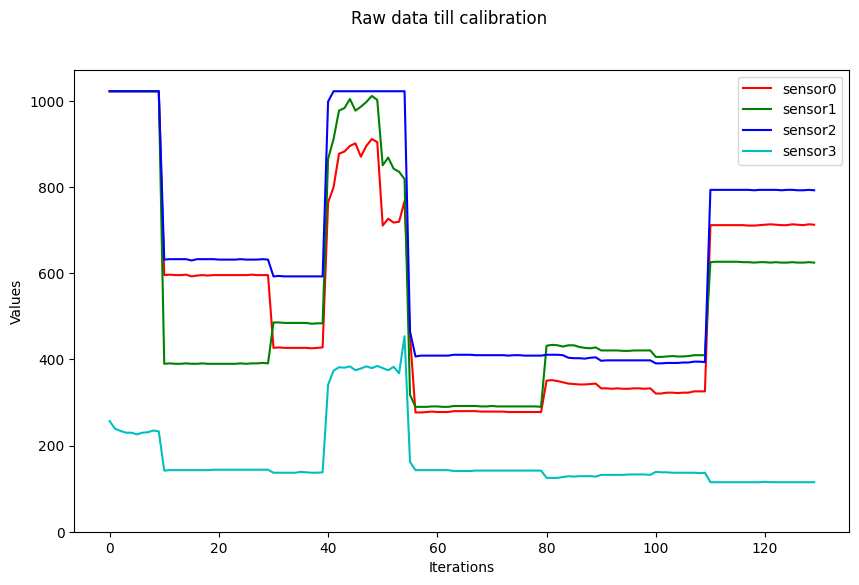

In [135]:
plot_params = dict(  
    
    calibr_axe_x_max = len(df_calibr) + 10,
    calibr_axe_x_min = 0,
    calibr_axe_y_max = params['sensor_max_value'] + 50,
    calibr_axe_y_min = 0,
    
    font = 9    
)



fig, ax = plt.subplots()   
ax.plot(df_calibr['sens0'], label='sensor0', color='r')
ax.plot(df_calibr['sens1'], label='sensor1', color='g')
ax.plot(df_calibr['sens2'], label='sensor2', color='b')    
ax.plot(df_calibr['sens3'], label='sensor3', color='c')  
ax.legend()
ax.set_xlabel('Iterations')
ax.set_ylabel('Values')
fig.suptitle('Raw data till calibration')
fig.set_size_inches(10, 6)

ax.set_ylim(bottom = plot_params['calibr_axe_y_min'])
ax.set_ylim(top = plot_params['calibr_axe_y_max'])


plt.show()

In [136]:
df_cal = pd.read_csv(params['calibr_persent_path'], sep=',', names = columns)

df_cal = df_cal.astype(int)
df_cal = (df_cal.assign(data_type='calibration')
                                .astype({'data_type':'category'})
                                .reset_index(drop=True)
            )
df_cal

,sens0,sens1,sens2,sens3,data_type
0,693,629,795,125,calibration
1,694,631,796,126,calibration
2,694,630,795,123,calibration
3,694,631,796,119,calibration
4,693,631,795,118,calibration
...,...,...,...,...,...
61,326,304,377,163,calibration
62,326,303,377,163,calibration
63,328,306,378,164,calibration
64,326,304,377,163,calibration


In [137]:
# Dry statistics
summary = df_cal.describe()
# Apply some styling
styled_summary = (summary
                        .style.set_table_styles([{'selector': 'th', 'props': [('background', '#7ca6db'), ('color', 'white')]}])
                        .format("{:.0f}")
                        .set_caption("Summary Statistics")
                       # .apply(lambda x: ['background: lightgreen' if (x.index == 'max') else '' for i in x], axis=1)
                       )

# Display
display(styled_summary)

,sens0,sens1,sens2,sens3
count,66,66,66,66
mean,448,424,583,161
std,161,140,159,18
min,317,297,377,118
25%,328,313,418,163
50%,368,326,578,164
75%,684,626,753,174
max,694,631,796,177


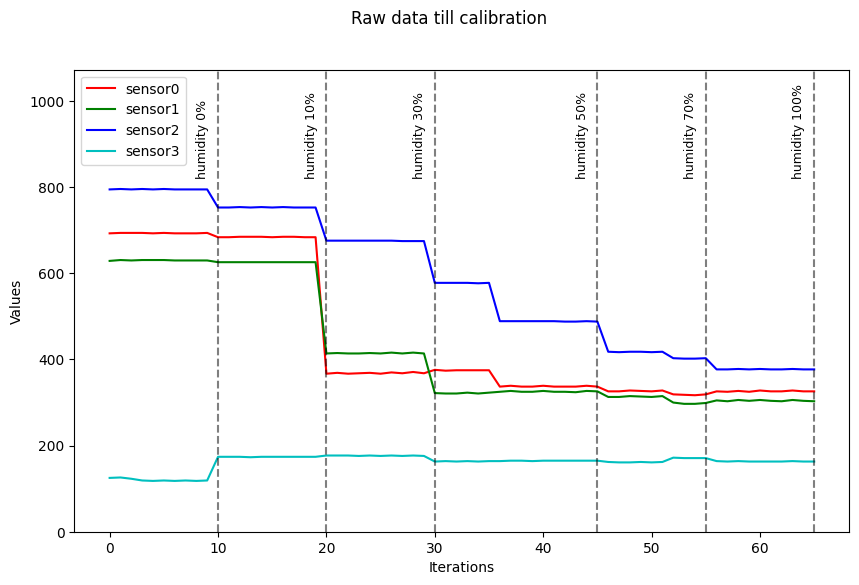

In [145]:
import matplotlib.pyplot as plt

plot_params = dict(      
    calibr_axe_x_max = len(df_calibr) + 10,
    calibr_axe_x_min = 0,
    calibr_axe_y_max = params['sensor_max_value'] + 50,
    calibr_axe_y_min = 0,    
    font = 9    
)


fig, ax = plt.subplots()   
ax.plot(df_cal['sens0'], label='sensor0', color='r')
ax.plot(df_cal['sens1'], label='sensor1', color='g')
ax.plot(df_cal['sens2'], label='sensor2', color='b')    
ax.plot(df_cal['sens3'], label='sensor3', color='c')  
ax.legend()
ax.set_xlabel('Iterations')
ax.set_ylabel('Values')
fig.suptitle('Raw data till calibration')
fig.set_size_inches(10, 6)

ax.set_ylim(bottom = plot_params['calibr_axe_y_min'])
ax.set_ylim(top = plot_params['calibr_axe_y_max'])


# Annotations for events
plt.axvline(x=10, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 0%'
             , xy=(8, 820)
             , xytext=(8,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )

plt.axvline(x=20, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 10%'
             , xy=(18, 820)
             , xytext=(18,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )

plt.axvline(x=65, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 100%'
             , xy=(63, 820)
             , xytext=(63,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )

plt.axvline(x=55, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 70%'
             , xy=(53, 820)
             , xytext=(53,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )

plt.axvline(x=45, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 50%'
             , xy=(43, 820)
             , xytext=(43,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )

plt.axvline(x=30, color='black', linestyle='--', alpha=0.5)
plt.annotate('humidity 30%'
             , xy=(28, 820)
             , xytext=(28,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )
plt.show()

In [146]:
calibr_100_percents = df_cal.min(numeric_only = True).tolist()
print("Minimal percent values:    ", calibr_100_percents)

calibration_100_percents = df_calibr.min(numeric_only = True).tolist()
print("Minimal calibration values:", calibration_100_percents)

Minimal percent values:     [317, 297, 377, 118]
Minimal calibration values: [277, 290, 391, 115]


In [147]:
calibr_0_percents = df_cal.max(numeric_only = True).tolist()
print("Maximal percent values:    ", calibr_0_percents)

calibration_0_percents = df_calibr.quantile(.75, numeric_only = True).astype(int).tolist()
print("Maximal calibration values:", calibration_0_percents)

Maximal percent values:     [694, 631, 796, 177]
Maximal calibration values: [712, 626, 794, 144]


In [148]:
calculated_10_percentage = list()
calculated_30_percentage = list()
calculated_50_percentage = list()
calculated_70_percentage = list()
for i in range(len(calibration_100_percents)):
    elMax = calibration_100_percents[i]
    elMin = calibration_0_percents[i]
    calculated_10_percentage.append(int(elMin + (elMax - elMin)*0.1))
    calculated_30_percentage.append(int(elMin + (elMax - elMin)*0.3))
    calculated_50_percentage.append(int(elMin + (elMax - elMin)*0.5))
    calculated_70_percentage.append(int(elMin + (elMax - elMin)*0.7))

perc_0 = df_cal.iloc[0:10].mean(numeric_only = True).astype(int).tolist()
perc_10 = df_cal.iloc[11:20].mean(numeric_only = True).astype(int).tolist()
perc_30 = df_cal.iloc[21:30].mean(numeric_only = True).astype(int).tolist()
perc_50 = df_cal.iloc[31:40].mean(numeric_only = True).astype(int).tolist()
perc_70 = df_cal.iloc[41:50].mean(numeric_only = True).astype(int).tolist()
perc_100 = df_cal.iloc[51:60].mean(numeric_only = True).astype(int).tolist()    
    
print("Observed ideal   0% of humidity:       ", calibration_0_percents)
print("Observed         0% of humidity, mean: ", perc_0, "\n")

print("Calculated      10% of humidity:       ", calculated_10_percentage)
print("Observed        10% of humidity, mean: ", perc_10, "\n")
    
print("Calculated      30% of humidity:       ", calculated_30_percentage)
print("Observed        30% of humidity, mean: ", perc_30, "\n")
    
print("Calculated      50% of humidity:       ", calculated_50_percentage)
print("Observed        50% of humidity, mean: ", perc_50, "\n")
    
print("Calculated      70% of humidity:       ", calculated_70_percentage)
print("Observed        70% of humidity, mean: ", perc_70, "\n")

print("Observed ideal 100% of humidity:       ", calibration_100_percents)
print("Observed       100% of humidity, mean: ", perc_100, "\n")

Observed ideal   0% of humidity:        [712, 626, 794, 144]
Observed         0% of humidity, mean:  [693, 630, 795, 120] 

Calculated      10% of humidity:        [668, 592, 753, 141]
Observed        10% of humidity, mean:  [684, 626, 753, 173] 

Calculated      30% of humidity:        [581, 525, 673, 135]
Observed        30% of humidity, mean:  [368, 414, 675, 176] 

Calculated      50% of humidity:        [494, 458, 592, 129]
Observed        50% of humidity, mean:  [358, 323, 538, 164] 

Calculated      70% of humidity:        [407, 390, 511, 123]
Observed        70% of humidity, mean:  [332, 320, 457, 163] 

Observed ideal 100% of humidity:        [277, 290, 391, 115]
Observed       100% of humidity, mean:  [322, 302, 393, 166] 



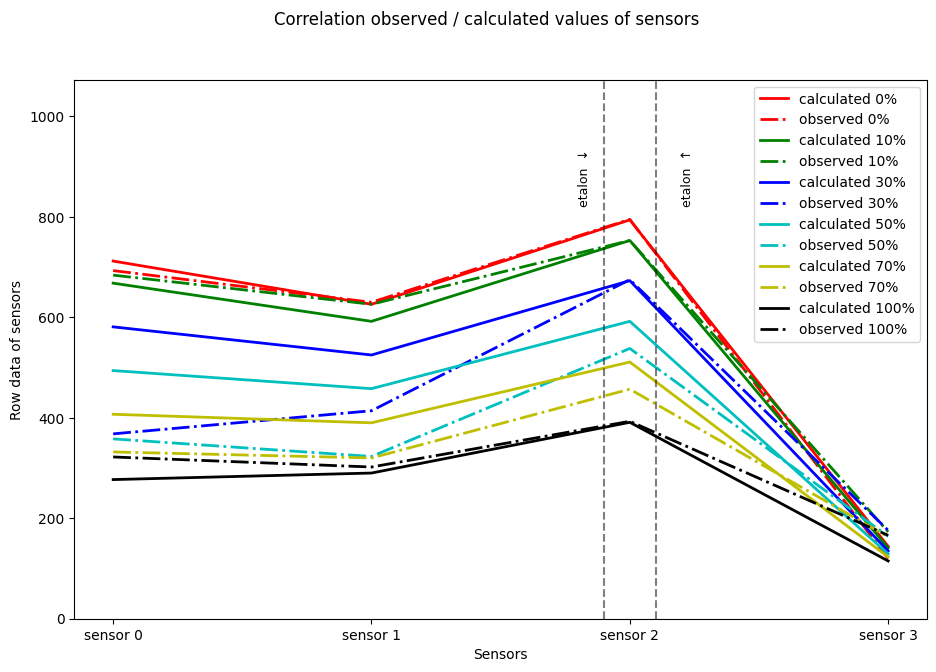

In [149]:
plot_params = dict(      
    calibr_axe_x_max = len(df_calibr) + 10,
    calibr_axe_x_min = 0,
    calibr_axe_y_max = params['sensor_max_value'] + 50,
    calibr_axe_y_min = 0,
    line_style_1 = '-',
    line_style_2 = 'dashdot',
    font = 9    
)


fig, ax = plt.subplots()

ax.plot(calibration_0_percents, label='calculated 0%', color='r', linestyle = plot_params['line_style_1'], linewidth = 2)
ax.plot(perc_0, label='observed 0%', color='r', linestyle = plot_params['line_style_2'], linewidth = 2)

ax.plot(calculated_10_percentage, label='calculated 10%', color='g', linestyle = plot_params['line_style_1'], linewidth = 2)
ax.plot(perc_10, label='observed 10%', color='g', linestyle = plot_params['line_style_2'], linewidth = 2)

ax.plot(calculated_30_percentage, label='calculated 30%', color='b', linestyle = plot_params['line_style_1'], linewidth = 2) 
ax.plot(perc_30, label='observed 30%', color='b', linestyle = plot_params['line_style_2'], linewidth = 2)    

ax.plot(calculated_50_percentage, label='calculated 50%', color='c', linestyle = plot_params['line_style_1'], linewidth = 2)
ax.plot(perc_50, label='observed 50%', color='c', linestyle = plot_params['line_style_2'], linewidth = 2)

ax.plot(calculated_70_percentage, label='calculated 70%', color='y', linestyle = plot_params['line_style_1'], linewidth = 2) 
ax.plot(perc_70, label='observed 70%', color='y', linestyle = plot_params['line_style_2'], linewidth = 2)  

ax.plot(calibration_100_percents, label='calculated 100%', color="k", linestyle = plot_params['line_style_1'], linewidth = 2)
ax.plot(perc_100, label='observed 100%', color="k", linestyle = plot_params['line_style_2'], linewidth = 2)

ax.legend()
ax.set_xlabel('Sensors')
ax.set_ylabel('Row data of sensors')
fig.suptitle('Сorrelation observed / calculated values of sensors')
fig.set_size_inches(11, 7)

ax.set_ylim(bottom = plot_params['calibr_axe_y_min'])
ax.set_ylim(top = plot_params['calibr_axe_y_max'])

ax.xaxis.set_ticks(np.arange(0, 4, 1.0), ['sensor 0', 'sensor 1', 'sensor 2', 'sensor 3'])

plt.axvline(x=1.9, color='black', linestyle='--', alpha=0.5)
plt.annotate('etalon  ↓'
             , xy=(1.8, 820)
             , xytext=(1.8, 820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )

plt.axvline(x=2.1, color='black', linestyle='--', alpha=0.5)
plt.annotate('etalon  ↑'
             , xy=(2.2, 820)
             , xytext=(2.2,820)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )

plt.show()

In [150]:
# dry air with sensor's perturbations

df_dry_perturb = pd.read_csv(params['drypath'], sep=',', names = columns)

df_dry_perturb = df_dry_perturb[~df_dry_perturb['sens0'].str.contains('-')]
df_dry_perturb = df_dry_perturb.astype(int)
df_dry_perturb = (df_dry_perturb.assign(data_type='dry air perturbations')
                                .astype({'data_type':'category'})
                                .reset_index(drop=True)
                 )
#df_dry_perturb


In [151]:
# dry air without any sensor's perturbations

df_dry_air = pd.read_csv(params['drypath_air'], sep=',', names = columns)

df_dry_air = df_dry_air[~df_dry_air['sens0'].str.contains('-')]
df_dry_air = df_dry_air.astype(int)
df_dry_air = (df_dry_air.assign(data_type='dry air')
                                .astype({'data_type':'category'})
                                .reset_index(drop=True)
                 )
#df_dry_air

In [152]:
# dry soil without any sensor's perturbations
df_dry_soil = pd.read_csv(params['drypath_soil'], sep=',', names = columns)

df_dry_soil = df_dry_soil[~df_dry_soil['sens0'].str.contains('-')]
df_dry_soil = df_dry_soil.astype(int)
df_dry_soil = (df_dry_soil.assign(data_type='dry soil')
                                .astype({'data_type':'category'})
                                .reset_index(drop=True)
                 )
#df_dry_soil

In [153]:
# sensors in water

df_moist_water = pd.read_csv(params['moistpath_water'], sep=',', names = columns)

df_moist_water = df_moist_water[~df_moist_water['sens0'].str.contains('-')]
df_moist_water = df_moist_water.astype(int)
df_moist_water = (df_moist_water.assign(data_type='moist water')
                                .astype({'data_type':'category'})
                                .reset_index(drop=True)
                 )
#df_moist_water

In [154]:
# TODO moist soil without any sensor's perturbations



In [155]:
# dry air + soil
df_dry = pd.concat([df_dry_perturb, df_dry_air, df_dry_soil]).reset_index(drop=True)

df_dry.iloc[98:115]

,sens0,sens1,sens2,sens3,data_type
98,687,625,807,104,dry air perturbations
99,687,625,808,104,dry air perturbations
100,689,600,798,122,dry air
101,689,600,798,121,dry air
102,688,600,797,122,dry air
103,689,600,798,122,dry air
104,689,600,798,122,dry air
105,689,600,798,122,dry air
106,688,600,798,122,dry air
107,689,600,798,122,dry air


In [156]:
# TODO moist water + soil



In [157]:
# all

df = pd.concat([df_dry, df_moist_water])

df

,sens0,sens1,sens2,sens3,data_type
0,698,634,814,109,dry air perturbations
1,698,634,814,109,dry air perturbations
2,698,634,814,109,dry air perturbations
3,698,634,815,109,dry air perturbations
4,698,634,814,109,dry air perturbations
...,...,...,...,...,...
35,246,256,322,50,moist water
36,246,255,321,50,moist water
37,245,255,321,50,moist water
38,246,255,321,51,moist water


## Dry statistics 



In [158]:
# Dry statistics
print('Dry air + soil statistics')
summary_stats = df_dry.describe()

# Apply some styling
styled_summary_stats = (summary_stats
                        .style.set_table_styles([{'selector': 'th', 'props': [('background', '#7ca6db'), ('color', 'white')]}])
                        .format("{:.0f}")
                        .set_caption("Summary Statistics")
                        .highlight_max(subset=None, color='lightgreen', axis=0, props=None)
                       # .apply(lambda x: ['background: lightgreen' if (x.index == 'max') else '' for i in x], axis=1)
                       )

# Display
display(styled_summary_stats)

Dry air + soil statistics


,sens0,sens1,sens2,sens3
count,310,310,310,310
mean,731,671,824,147
std,129,156,91,64
min,649,486,743,103
25%,669,589,779,118
50%,681,602,791,124
75%,694,633,814,126
max,1023,1023,1023,355


## Moist statistics 



In [159]:
# Moist statistics
summary_stats = df_moist_water.describe()

# Apply some styling
styled_summary_stats = (summary_stats
                        .style.set_table_styles([{'selector': 'th', 'props': [('background', '#7ca6db'), ('color', 'white')]}])
                        .format("{:.0f}")
                        .set_caption("Summary Statistics")
                       # .highlight_max(subset=None, color='lightgreen', axis=0, props=None)       
                        )

# Display
display(styled_summary_stats)

,sens0,sens1,sens2,sens3
count,40,40,40,40
mean,250,260,330,56
std,4,4,6,6
min,245,255,321,50
25%,247,257,325,51
50%,250,260,331,55
75%,254,264,335,61
max,254,264,335,65


## Standartisation



In [160]:
# WARNING : TODO made for 'dry_air' without perturbations, but need for 'dry_soil'

# row values for sensors 0-3, starting from which the soil is considered well dried
# i.e.   if value is from    [dry_0_percents, 1023] =>  soil is 0% watered

dry_0_percents = df_dry_air.min(numeric_only = True).tolist()
dry_0_percents

[669, 573, 783, 121]

In [161]:
# WARNING : made for 'moist_water' without perturbations, but need for 'moist_soil'

# row values for sensors 0-3, starting from which the soil is considered well watered  
# i.e.   if value is from    [0, moist_100_percent] =>  soil is 100% watered

moist_100_percent = df_moist_water.max(numeric_only = True).tolist()
moist_100_percent

[254, 264, 335, 65]

In [162]:
standarts = dict(
    sens0_zero_watered = dry_0_percents[0],
    sens0_full_watered = moist_100_percent[0],
    sens1_zero_watered = dry_0_percents[1],
    sens1_full_watered = moist_100_percent[1],
    sens2_zero_watered = dry_0_percents[2],
    sens2_full_watered = moist_100_percent[2],
    sens3_zero_watered = dry_0_percents[3],
    sens3_full_watered = moist_100_percent[3]
)

standarts

{'sens0_zero_watered': 669,
 'sens0_full_watered': 254,
 'sens1_zero_watered': 573,
 'sens1_full_watered': 264,
 'sens2_zero_watered': 783,
 'sens2_full_watered': 335,
 'sens3_zero_watered': 121,
 'sens3_full_watered': 65}

## Visualization 

In [163]:
plot_params = dict(
    dry_axe_x_max = len(df_dry) + 10,
    dry_axe_x_min = 0,
    dry_axe_y_max = params['sensor_max_value'] + 50,
    dry_axe_y_min = 0,
    moist_axe_x_max = len(df_moist_water) + 10,
    moist_axe_x_min = 0,
    moist_axe_y_max = params['sensor_max_value'] + 50,
    moist_axe_y_min = 0,
    font = 9    
)

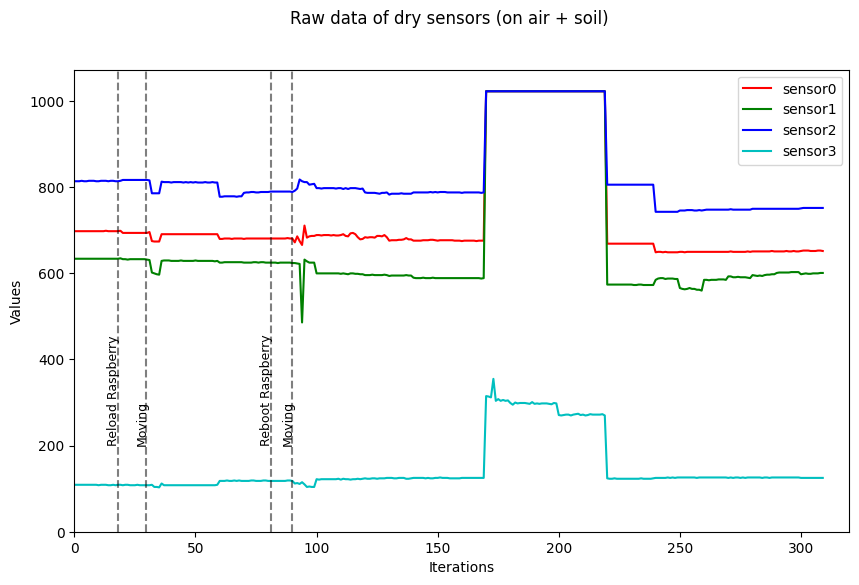

In [164]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#fig, axs = plt.subplots(nrows= 2 , ncols= 1 )


plt.axis([plot_params['dry_axe_x_min']
          , plot_params['dry_axe_x_max']
          , plot_params['dry_axe_y_min']
          , plot_params['dry_axe_y_max']])

ax.plot(df_dry['sens0'], label='sensor0', color='r')
ax.plot(df_dry['sens1'], label='sensor1', color='g')
ax.plot(df_dry['sens2'], label='sensor2', color='b')    
ax.plot(df_dry['sens3'], label='sensor3', color='c')  
ax.legend()
ax.set_xlabel('Iterations')
ax.set_ylabel('Values')
fig.suptitle('Raw data of dry sensors (on air + soil)')
fig.set_size_inches(10, 6)


#axs[0].plot(df_dry.index, df_dry[['sens0', 'sens1', 'sens2', 'sens3']].values)
#axs[0].set_title('Dry')
#

ax.set_ylim(bottom=plot_params['dry_axe_y_min'])
ax.set_ylim(top=plot_params['dry_axe_y_max'])

# Annotations for events
coeff = (1 - 1/10) #each 11th line contained timestamp was deleted, so need to correct

plt.axvline(x = 20*coeff, color='black', linestyle='--', alpha=0.5)
plt.annotate('Reload Raspberry'
             , xy=(15*coeff, 200)
             , xytext=(15*coeff,200)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )
plt.axvline(x=33*coeff, color='black', linestyle='--', alpha=0.5)
plt.annotate('Moving'
             , xy=(28*coeff, 200)
             , xytext=(28*coeff,200)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )

plt.axvline(x=90*coeff, color='black', linestyle='--', alpha=0.5)
plt.annotate('Reboot Raspberry'
             , xy=(83*coeff, 200)
             , xytext=(85*coeff,200)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )

plt.axvline(x=100*coeff, color='black', linestyle='--', alpha=0.5)
plt.annotate('Moving'
             , xy=(95*coeff, 200)
             , xytext=(95*coeff,200)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )
plt.show()

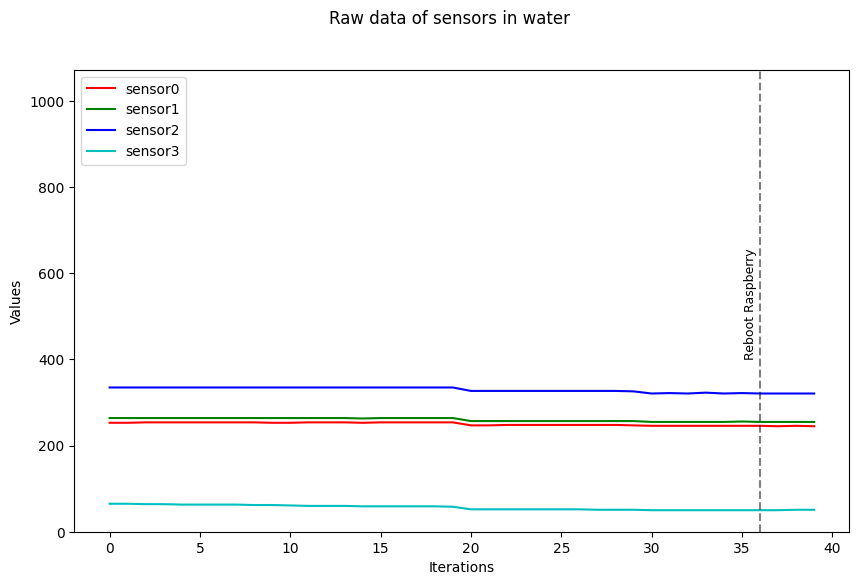

In [165]:
# Raw data of sensors in water

fig, ax = plt.subplots()   
ax.plot(df_moist_water['sens0'], label='sensor0', color='r')
ax.plot(df_moist_water['sens1'], label='sensor1', color='g')
ax.plot(df_moist_water['sens2'], label='sensor2', color='b')    
ax.plot(df_moist_water['sens3'], label='sensor3', color='c')  
ax.legend()
ax.set_xlabel('Iterations')
ax.set_ylabel('Values')
fig.suptitle('Raw data of sensors in water')
fig.set_size_inches(10, 6)

ax.set_ylim(bottom = plot_params['moist_axe_y_min'])
ax.set_ylim(top = plot_params['moist_axe_y_max'])


# Annotations for events
plt.axvline(x=40*coeff, color='black', linestyle='--', alpha=0.5)
plt.annotate('Reboot Raspberry'
             , xy=(39*coeff, 400)
             , xytext=(39*coeff,400)
             , rotation=90
             , size=plot_params['font']
             , verticalalignment='bottom'
            )

plt.show()